<a href="https://colab.research.google.com/github/vysf/machine-learning-practice/blob/master/Membuat_dan_Melatih_Model_untuk_Memproses_Dataset_Gambar_dari_Dunia_Nyata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-12-14 03:27:24--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-12-14 03:27:25--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   302MB/s    in 

In [ ]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'King', 'Pawn', 'Bishop', 'Knight', 'Queen']

In [ ]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


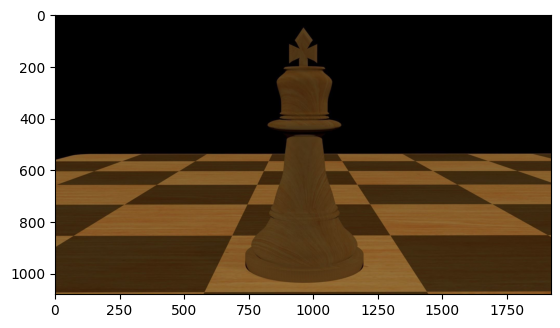

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    # # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.4),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.4),
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 491s - loss: 2.4436 - accuracy: 0.1904 - val_loss: 246325568.0000 - val_accuracy: 0.1538 - 491s/epoch - 8s/step
Epoch 2/50
63/63 - 439s - loss: 1.9453 - accuracy: 0.1784 - val_loss: 1294.6653 - val_accuracy: 0.1923 - 439s/epoch - 7s/step
Epoch 3/50
63/63 - 449s - loss: 1.9179 - accuracy: 0.1944 - val_loss: 383787.5312 - val_accuracy: 0.1346 - 449s/epoch - 7s/step
Epoch 4/50
63/63 - 428s - loss: 1.9065 - accuracy: 0.1884 - val_loss: 13.8243 - val_accuracy: 0.2115 - 428s/epoch - 7s/step
Epoch 5/50
63/63 - 426s - loss: 1.9219 - accuracy: 0.1643 - val_loss: 70.9005 - val_accuracy: 0.1538 - 426s/epoch - 7s/step
Epoch 6/50
63/63 - 425s - loss: 1.9555 - accuracy: 0.1824 - val_loss: 857.1160 - val_accuracy: 0.1538 - 425s/epoch - 7s/step
Epoch 7/50
63/63 - 428s - loss: 1.8738 - accuracy: 0.2064 - val_loss: 1.8868 - val_accuracy: 0.2885 - 428s/epoch - 7s/step
Epoch 8/50
63/63 - 427s - loss: 1.8788 - accuracy: 0.1964 - val_loss: 150.9889 - val_accuracy: 0.2115 - 427s/epoch - 7s

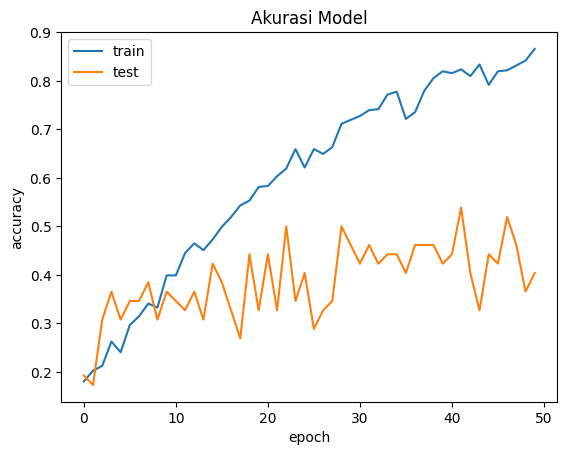

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

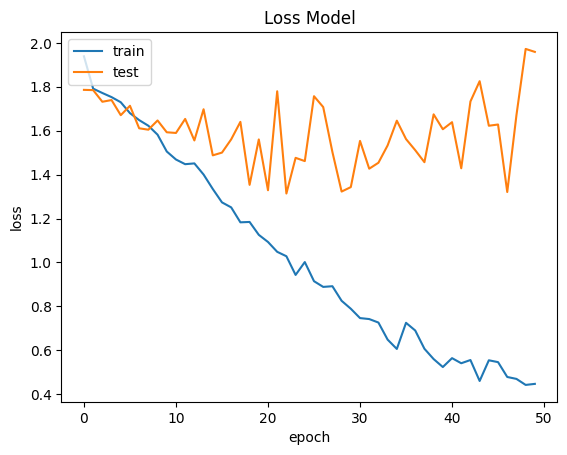

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()